# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 1 - ODE

In [11]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Euler Method

The Euler method is the simplest method to solve first order ODE's:

$$\frac{dy}{dt} = f(y,t), \, y(0) = y_{0}$$

Using a Taylor series, one can verify that

$$y(t + \Delta t) = y(t) + f(y, t) \Delta t$$

or

$$y_{i+1} = y_{i} + f(y_{i}, t_{i}) \Delta t$$

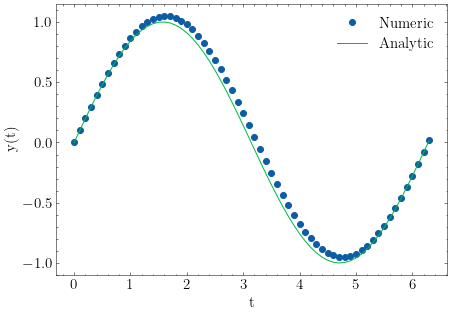

In [12]:
# Euler method

dt = 0.1
t = np.arange(0, 2*np.pi + dt, dt)
N = len(t)
y = np.zeros(N)
y[0] = 0

def f(t):
    "Integrating cos(t). We expect sin(t) as result."
    return np.cos(t)

for i in range(N-1):
    y[i+1] = y[i] + f(t[i])*dt

plt.plot(t, y, marker='o', linestyle='', label="Numeric")
plt.plot(t, np.sin(t), label="Analytic")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## 2nd order ODE's

A 2nd order ODE such as

$$ \frac{d^2 r}{dt^2} = f(r,t)$$

can be solved by decoupling into two 1st order ODE's:

$$ \frac{d r}{dt} = v $$

$$ \frac{d v}{dt} = f $$

Applying the Euler method to both equations we have:

$$ r_{i+1} = r_{i} + v_{i} \Delta t $$

$$ v_{i+1} = v_i + f(r_i, t_i) \Delta t $$

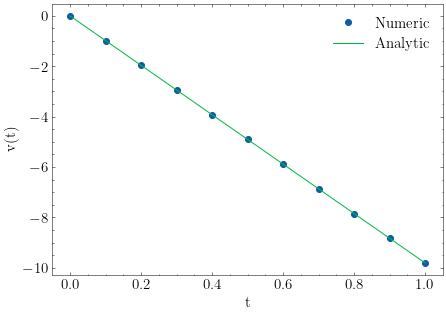

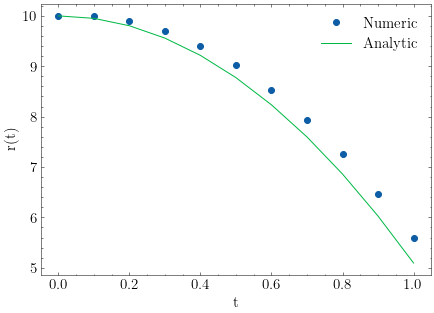

In [13]:
# Solving a free fall without air friction using Euler method

dt = 0.1
t = np.arange(0, 1.0 + dt, dt)
N = len(t)
g = 9.81

r = np.zeros(N)
v = np.zeros(N)

r[0] = 10.0
v[0] = 0.0

def f(g=9.81):
    return -g

for i in range(N - 1):
    v[i+1] = v[i] + f()*dt
    r[i+1] = r[i] + v[i]*dt

plt.plot(t, v, marker='o', linestyle='',label="Numeric")
plt.plot(t, -g*t, label="Analytic")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()
plt.show()

plt.plot(t, r, marker='o', linestyle='', label="Numeric")
plt.plot(t, 10.0 - 0.5*g*t**2, label="Analytic")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.legend()
plt.show()

## Modified Euler method

A better approximation is to use $v_{i+1}$ instead of $v_{i}$ when integrating the position:

$$ r_{i+1} = r_{i} + v_{i + 1} \Delta t $$

$$ v_{i+1} = v_i + f(r_i, t_i) \Delta t $$

this yields a more stable solution, and is know as modified Euler method, or Euler-Cromer, or last-pass approximation.

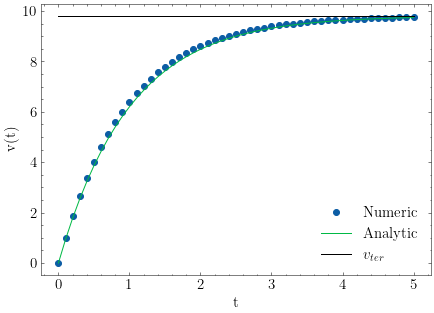

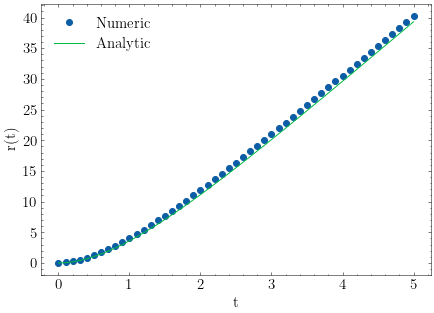

In [14]:
# Solving a free fall with linear drag with Euler-Cromer

dt = 0.1
t = np.arange(0, 5.0 + dt, dt)
N = len(t)

m = 1.0
b = 1.0
g = 9.81
v_ter = m*g/b 
vy0 = 0.0
r0 = 0.0
tau = m/b

r = np.zeros(N)
v = np.zeros(N)

r[0] = r0
v[0] = vy0

def f(v, m=1, b=1, g=9.81):
    return g - b*v/m

def v_exact(t, v_ter, vy0, tau):
    return v_ter + (vy0 - v_ter)*np.exp(-t/tau)

def r_exact(t, v_ter, r0, tau):
    return r0 + v_ter * t + (vy0 - v_ter)*tau*(1 - np.exp(-t/tau))


for i in range(N - 1):
    v[i+1] = v[i] + f(v[i])*dt
    r[i+1] = r[i] + v[i + 1]*dt

plt.plot(t, v, marker='o', linestyle='',label="Numeric")
plt.plot(t, v_exact(t, v_ter, vy0, tau), label="Analytic")
plt.plot(t, t*0 + v_ter, c='k', label="$v_{ter}$")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()
plt.show()

plt.plot(t, r, marker='o', linestyle='', label="Numeric")
plt.plot(t, r_exact(t, v_ter, r0, tau), label="Analytic")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.legend()
plt.show()

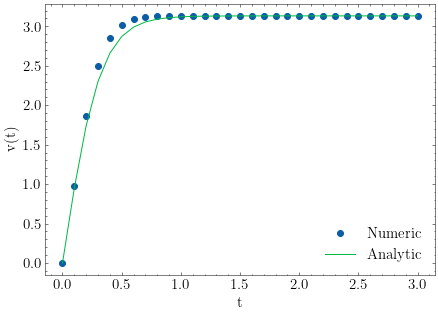

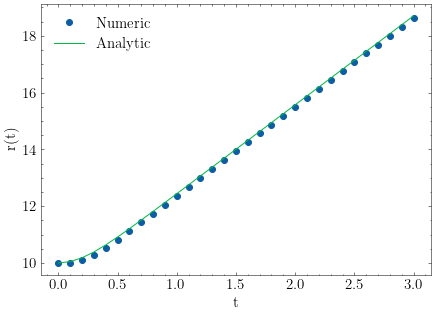

In [15]:
# Quadratic drag

dt = 0.1
t = np.arange(0, 3.0 + dt, dt)
N = len(t)

m = 1.0
c = 1.0
g = 9.81
v_ter = np.sqrt(m*g/c) 
vy0 = 0.0
r0 = 10.0
tau = m/b

r = np.zeros(N)
v = np.zeros(N)

r[0] = r0
v[0] = vy0

def f(v, m=1, b=1, g=9.81):
    return g - b*v*abs(v)/m


def v_quad_exact(t):
    return v_ter*np.tanh(g*t/v_ter)

def r_quad_exact(t):
    return r0 + ((v_ter)**2)*np.log(np.cosh(g*t/v_ter))/g


for i in range(N - 1):
    v[i+1] = v[i] + f(v[i])*dt
    r[i+1] = r[i] + v[i]*dt

plt.plot(t, v, marker='o', linestyle='',label="Numeric")
plt.plot(t, v_quad_exact(t), label="Analytic")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend()
plt.show()

plt.plot(t, r, marker='o', linestyle='', label="Numeric")
plt.plot(t, r_quad_exact(t), label="Analytic")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.legend()
plt.show()

## Generalizing the problem

We can generalize the problem we've been solving as

\begin{equation}
m \frac{d^2 r}{dt^2} = -mg - c |v|^{b-1} v,
\end{equation}

where $b = 1$ (linear air resistance) or $b = 2$ (quadratic air resistance). It is easy to verify that these problems have a terminal velocity:

\begin{equation}
\frac{d^2 r}{dt^2} = -g\left(1 + \frac{c}{mg} |v|^{b-1} v \right) = -g\left(-1 + \tilde{v}^b \right),
\end{equation}

where

\begin{equation}
\tilde{v} = \frac{v}{v_{ter}}, \, v_{ter} = -\left(\frac{mg}{c}\right)^{1/b}.
\end{equation}

We can proceed to make our equation dimensionless by defining $t = a \tilde{t}$:

\begin{equation}
\frac{d v}{dt} = -g\left(1 + \tilde{v}^b \right),
\end{equation}

\begin{equation}
\frac{v_{ter}}{a g} \frac{d \tilde{v}}{d \tilde{t}} = -\left(1 + \tilde{v}^b \right),
\end{equation}

Thus $a = v_{ter}/g$ and we arrive:

\begin{equation}
\frac{d \tilde{v}}{d \tilde{t}} = -\left(1 + \tilde{v}^b \right),
\end{equation}

Our position equation can be made dimensionless in a similar fashion defining $y = b \tilde{y}$ :

\begin{equation}
\frac{d y}{d t} = v,
\end{equation}

\begin{equation}
\frac{b g}{v_{ter}} \frac{d \tilde{y}}{d \tilde{t}} = \tilde{v}\, v_{ter},
\end{equation}

\begin{equation}
\frac{b g}{v_{ter}^2} \frac{d \tilde{y}}{d \tilde{t}} = \tilde{v}.
\end{equation}

Then,

\begin{equation}
\frac{d \tilde{y}}{d \tilde{t}} = \tilde{v},
\end{equation}

by $b = v_{ter}^2 / g$. Summing up, our problem is to solve:

\begin{align}
\frac{d \tilde{v}}{d \tilde{t}} &= -(1 + \tilde{v}^b) \\
\frac{d \tilde{y}}{d \tilde{t}} &= \tilde{v}
\end{align}

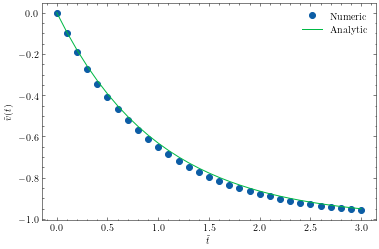

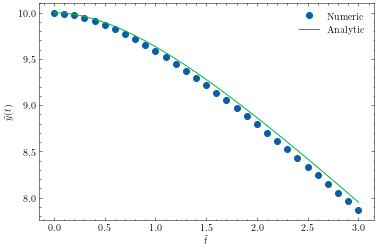

In [6]:
# Linear air resistance

dt = 0.1
t = np.arange(0, 3.0 + dt, dt)
N = len(t)

m = 1.0
c = 1.0
g = 9.81
b = 1  # Linear air resistance
v_ter = -(m*g/c)**(1/b)

vy0 = 0.0
r0 = 10.0

r = np.zeros(N)
v = np.zeros(N)

r[0] = r0
v[0] = vy0


def f(v, b):
    return -(1 + v*abs(v)**(b-1))

def v_linear_exact(t, vy0, v_ter):
    v0_tilde = vy0/v_ter
    return (1 + v0_tilde)*np.exp(-t) - 1

def r_linear_exact(t, r0, vy0, v_ter):
    g = 9.81
    v0_tilde = vy0/v_ter
    r0_tilde = (r0*g)/(v_ter**2)
    return r0 + (1 + v0_tilde)*(1 - np.exp(-t)) - t

for i in range(N-1):
    v[i+1] = v[i] + f(v[i], b)*dt
    r[i+1] = r[i] + v[i + 1]*dt

plt.plot(t, v, marker='o', linestyle='',label="Numeric")
plt.plot(t, v_linear_exact(t, vy0, v_ter), label="Analytic")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel(r'$\tilde{v}(t)$')
plt.legend()
plt.show()

plt.plot(t, r, marker='o', linestyle='', label="Numeric")
plt.plot(t, r_linear_exact(t, r0, vy0, v_ter), label="Analytic")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel(r'$\tilde{y}(t)$')
plt.legend()
plt.show()

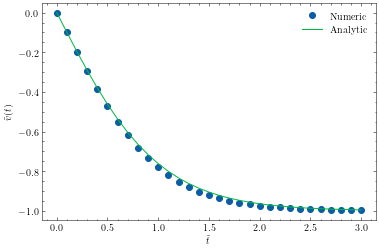

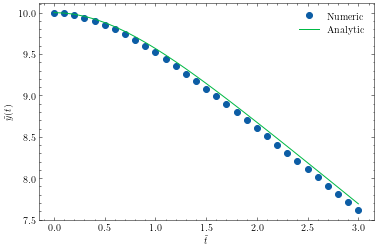

In [7]:
# Quadratic air resistance

dt = 0.1
t = np.arange(0, 3.0 + dt, dt)
N = len(t)

m = 1.0
c = 1.0
g = 9.81
b = 2  # Quadratic air resistance
v_ter = -np.sqrt((m*g/c))

vy0 = 0.0
r0 = 10.0

r = np.zeros(N)
v = np.zeros(N)

r[0] = r0
v[0] = vy0

def f(v, b):
    return -(1 + v*abs(v)**(b-1))

def v_quad_exact(t, vy0):
    return np.tanh(np.arctanh(vy0) - t)

def r_quad_exact(t, r0):
    return r0 - np.log(np.cosh(t))

for i in range(N-1):
    v[i+1] = v[i] + f(v[i], b)*dt
    r[i+1] = r[i] + v[i + 1]*dt

plt.plot(t, v, marker='o', linestyle='',label="Numeric")
plt.plot(t, v_quad_exact(t, vy0), label="Analytic")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel(r'$\tilde{v}(t)$')
plt.legend()
plt.show()

plt.plot(t, r, marker='o', linestyle='', label="Numeric")
plt.plot(t, r_quad_exact(t, r0), label="Analytic")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel(r'$\tilde{y}(t)$')
plt.legend()
plt.show()

## Energies

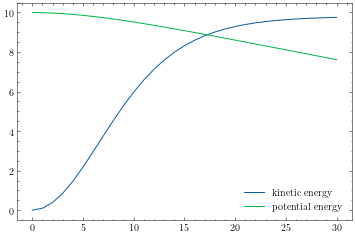

In [8]:
v_units = v*v_ter
t_units = g*t/v_ter
r_units = r*((v_ter**2)/g)

kinetic = 0.5*m*v_units**2
potential = r_units

plt.plot(v_units**2, label='kinetic energy')
plt.plot(r, label='potential energy')
plt.legend()
plt.show()

## Errors

<ipython-input-7-90e09a08734d>:26: RuntimeWarning: invalid value encountered in arctanh
  return np.tanh(np.arctanh(vy0) - t)


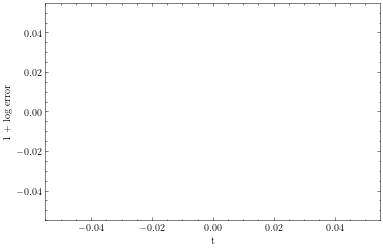

In [9]:
# # Plotting the error

# plt.plot(t, np.log(np.abs(1 + v - v_quad_exact(t, v_ter))))
# plt.xlabel('t')
# plt.ylabel('1 + log error')
# plt.show()

## 2nd order Runge-Kutta

Until now, we are approximating our slope at the start or the end of the timestep. A better approximation is to use the midpoint:

\begin{equation}
x(t+h) = x(t) + h\, f \left(x(t+h/2), t+ h/2  \right).
\end{equation}

Since we don't know $x(t+h/2)$, use Euler's method:

\begin{equation}
x(t+h/2) = x(t) + \frac{h}{2} \, f \left(x(t),t \right).
\end{equation}

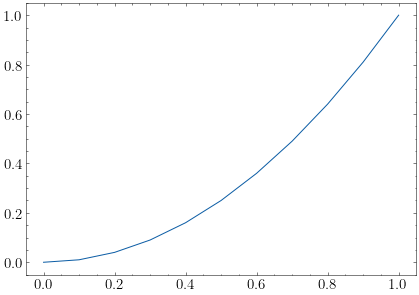

In [23]:
# RK2

dt = 0.1
t = np.arange(0, 1.0 + dt, dt)
N = len(t)

def f(x, t):
    return 2*t + 0*x

x = np.zeros(N)
x0 = 0.0
x[0] = x0

for i in range(N-1):
    k1 = f(x[i], t[i])
    k2 = f(x[i] + 0.5*dt*k1, t[i] + 0.5*dt)
    x[i+1] = x[i] + dt*k2
    
plt.plot(t, x)
plt.show()

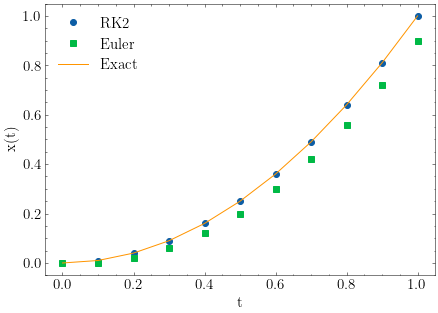

In [31]:
# Packing those things in functions

def RK2(f, t, dt, x0):
    N = len(t)
    x = np.zeros(N)
    x[0] = x0
    for i in range(N-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + 0.5*dt*k1, t[i] + 0.5*dt)
        x[i+1] = x[i] + dt*k2
    return x


def euler(f, t, dt, x0):
    N = len(t)
    x = np.zeros(N)
    x[0] = x0
    for i in range(N-1):
        x[i+1] = x[i] + dt*f(x[i], t[i])
    return x


x_rk2 = RK2(f, t, dt, x0)
x_euler = euler(f, t, dt, x0)

plt.plot(t, x_rk2, linestyle='', marker='o', label="RK2")
plt.plot(t, x_euler, linestyle='', marker='s', label="Euler")
plt.plot(t, t**2, label="Exact")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

In [10]:
# To do

# Plottin error
# Implementing io
# Implementing RK4
# Rocket problem
# predictor-corrector method